<a href="https://colab.research.google.com/github/pdoren/analisis-estadistico-con-Python-G105/blob/main/Desaf%C3%ADo_Estad%C3%ADstica_descriptiva_y_probabilidades_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Estadística Descripctiva y Probabilidad (Parte 1)

**Nombre:** Pablo Saavedra Doren <br />
**Curso:** Análisis estadístico con Python (G105)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## 1. Estadísticas Generales

Para las estadísticas generales del salario se se utiliza la columna **'salary_in_usd'** para unificar la moneda para que la comparación sea valida entre los distintos montos de distitos tipos de monedas.

In [2]:
def print_estadisticas_salario(serie: pd.Series, title: str):
  # Función para calcular y mostrar estadíticas
  media = serie.mean()
  mediana = serie.median()
  desv_std = serie.std()
  quintiles = serie.quantile([0.2, 0.4, 0.6, 0.8])
  rango = round(serie.max() - serie.min(), 2)

  print('-' * 80)
  print(title)
  print('-' * 80)
  print(f"Media: ${media:,.2f}")
  print(f"Mediana: ${mediana:,.2f}")
  print(f"Desviación estándar: ${desv_std:,.2f}")
  print(f"Quintiles:")
  for index, quintil in enumerate(quintiles):
        print(f"   {(index + 1) * 0.2:.1f}: ${quintil:,.2f}")
  print(f"Rango: ${rango:,.2f} [${serie.min():,.2f} - ${serie.max():,.2f}]")
  print('-' * 80)


print_estadisticas_salario(serie=df['salary_in_usd'], title="Estadísticas Generales [USD]")

--------------------------------------------------------------------------------
Estadísticas Generales [USD]
--------------------------------------------------------------------------------
Media: $137,570.39
Mediana: $135,000.00
Desviación estándar: $63,055.63
Quintiles:
   0.2: $83,972.80
   0.4: $120,000.00
   0.6: $149,850.00
   0.8: $185,900.00
Rango: $444,868.00 [$5,132.00 - $450,000.00]
--------------------------------------------------------------------------------


Respecto a los datos estadísticos del salario general se puede concluir:


1. El promedio (media) es ligeramente superior a la mediana esto indica que la distribución de sueldos es practicamente simétrica aunque un poco cargada hacia la derecha (existencia de sueldos muy altos).
2. La desviación estándar es grande, por lo tanto, la distribición de los salarios es alta. Esto se confirma al revisar el rango.
  

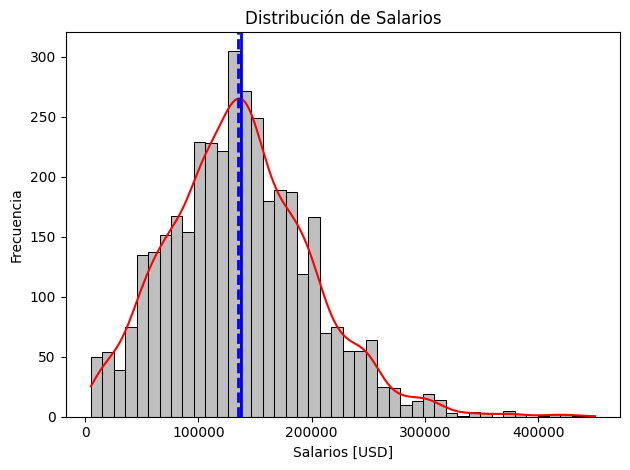

In [3]:
def plot_distribucion(serie: pd.Series, title: str, xlabel: str, ylabel: str='Frecuencia'):
  # Función para mostrar histograma y distribución de serie
  ax = sns.histplot(data=serie, kde=True, color='gray')
  ax.lines[0].set_color('red')
  ax.axvline(serie.mean(), color='b', lw=2)
  ax.axvline(serie.median(), color='b', ls='--', lw=2)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

plot_distribucion(serie=df['salary_in_usd'], title='Distribución de Salarios',
                  xlabel='Salarios [USD]')

plt.tight_layout()

## 2. Estadísticas Agrupadas

Para realizar el análisis agrupado se seleccionó la columna job_title, es decir, el puesto de trabajo desempeñado durante el año. Además, se escogieron como categorias los siguientes puestos debido a que son los que concentran la mayor cantidad de empleados:

1. Data Analyst
2. Data Engineer
3. Data Scientist

A continuación, se procede a calcular

In [4]:
categorias = ['Data Analyst', 'Data Engineer', 'Data Scientist']
columna = 'job_title'

for categoria in categorias:
  serie_grupo = df[df[columna] == categoria].groupby(columna).apply(pd.DataFrame, include_groups=False)['salary_in_usd']
  print_estadisticas_salario(serie=serie_grupo, title=f'Estadística Salario {categoria}')


--------------------------------------------------------------------------------
Estadística Salario Data Analyst
--------------------------------------------------------------------------------
Media: $108,716.23
Mediana: $106,020.00
Desviación estándar: $46,912.10
Quintiles:
   0.2: $70,037.20
   0.4: $99,020.00
   0.6: $115,934.00
   0.8: $147,800.00
Rango: $425,244.00 [$5,723.00 - $430,967.00]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Estadística Salario Data Engineer
--------------------------------------------------------------------------------
Media: $142,785.73
Mediana: $135,000.00
Desviación estándar: $58,038.09
Quintiles:
   0.2: $93,590.00
   0.4: $129,000.00
   0.6: $150,000.00
   0.8: $185,900.00
Rango: $312,000.00 [$12,000.00 - $324,000.00]
--------------------------------------------------------------------------------
---------------------------------

Comparando entre los 3 salarios agrupados se puede decir al respecto:

1. Las medidas de tendencia central más representativa es el salario promedio de Data Analyst debido a que tiene la menor desviación estándar entre las 3 categorias.
2. El promedio menos representativo es el salario de Data Scientist debido a que la desviación estándar es la mayor entre las 3 categorias.
3. Al revisar el rango de salarios en las 3 categorias se observa que son bastante grandes. Esto se debe a que en los datos se incluye tipos de trabajo y niveles de experiencia diferentes que hacen incluir en la comparación Juniors y Seniors en el mismo grupo. Incluso si se filtra los datos (ver abajo) para evitar comparaciones inexactas, se sigue observando rangos de sueldos muy altos.

In [5]:
df_filtrado = df[
                 (df['company_location'] ==  'US') &
                 (df['employee_residence'] ==  'US') &
                 (df['employment_type'] ==  'FT') &
                 (df['work_year'] ==  2023) &
                 (df['company_size'] ==  'M') &
                 (df['experience_level'] ==  'SE')
                 ]

for categoria in categorias:
  serie_grupo = df_filtrado[df_filtrado[columna] == categoria].groupby(columna).apply(pd.DataFrame, include_groups=False)['salary_in_usd']
  print_estadisticas_salario(serie=serie_grupo, title=f'Estadística Salario {categoria}')

--------------------------------------------------------------------------------
Estadística Salario Data Analyst
--------------------------------------------------------------------------------
Media: $129,456.51
Mediana: $121,952.00
Desviación estándar: $43,827.97
Quintiles:
   0.2: $94,600.00
   0.4: $110,600.00
   0.6: $135,000.00
   0.8: $165,000.00
Rango: $333,038.00 [$51,962.00 - $385,000.00]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Estadística Salario Data Engineer
--------------------------------------------------------------------------------
Media: $160,200.92
Mediana: $150,000.00
Desviación estándar: $52,898.95
Quintiles:
   0.2: $120,000.00
   0.4: $139,500.00
   0.6: $163,800.00
   0.8: $205,140.00
Rango: $247,000.00 [$63,000.00 - $310,000.00]
--------------------------------------------------------------------------------
------------------------------

## 3. Sueldos Altos

Para identificar los puestos con mayores sueldos en Estados Unidos se realzará un filtro sobre la columna company_location y luego se agrupara por puesto, es decir, por la columna job_title. Además, se utilizara el promedio antes de obtener los 5 mayores sueldos para que el ranking sea más representativo por cada puesto (evitar el efecto de sueldos altos).

In [6]:
df_us = df[df['company_location'] == 'US'].groupby('job_title')['salary_in_usd'].mean()

top5 = df_us.nlargest(5)

print('-' * 80)
print('Ranking de mayores sueldos por puesto')
print('-' * 80)
for index, (puesto, sueldo) in enumerate(top5.items()):
  print(f"  {index + 1}º -> ${sueldo:,.2f} {puesto}")
print('-' * 80)

--------------------------------------------------------------------------------
Ranking de mayores sueldos por puesto
--------------------------------------------------------------------------------
  1º -> $405,000.00 Data Analytics Lead
  2º -> $375,000.00 Data Science Tech Lead
  3º -> $294,375.00 Director of Data Science
  4º -> $255,500.00 Principal Data Scientist
  5º -> $250,000.00 Cloud Data Architect
--------------------------------------------------------------------------------


Los cargos con mejores sueldos son los lideres y ejecutivos relacionados con manejo de datos. El puesto con mayor sueldo es el Lider de Análisis de Datos, luego el Lider y Director de Ciencia de Datos. El mayor salto de diferencia de sueldo entre puesto, es entre el tercero y segundo, llegando a $80.625 dolares (más de un 27%).